# Import package

In [169]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('fivethirtyeight')
sns.set(style = 'whitegrid',context = 'notebook')

# generate classification report using predictions for categorical model
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn import (metrics,  linear_model, preprocessing)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, learning_curve, StratifiedKFold

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 175)

# Import data

In [170]:
df = pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [171]:
original_df = df.copy()

In [172]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [173]:
df.shape

(768, 9)

In [174]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [175]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


In [176]:
df.Glucose.describe()

count    763.000000
mean     121.686763
std       30.535641
min       44.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

# Preprocessing data

## Examing missing data

In [177]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [178]:
miss_val_df = pd.DataFrame(df.isnull().sum(),columns=['Count'])
miss_val_df['Percentage'] = 100 * df.isnull().mean()
miss_val_df.sort_values('Percentage', ascending=False)

,Count,Percentage
Insulin,374,48.697917
SkinThickness,227,29.557292
BloodPressure,35,4.557292
BMI,11,1.432292
Glucose,5,0.651042
Pregnancies,0,0.000000
DiabetesPedigreeFunction,0,0.000000
Age,0,0.000000
Outcome,0,0.000000


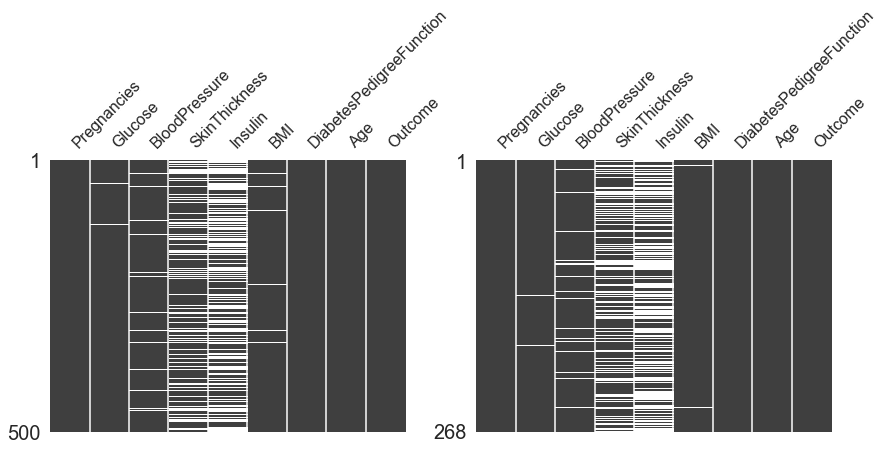

In [179]:
df_c0 = df.loc[df.Outcome == 0]
df_c1 = df.loc[df.Outcome == 1]

import missingno as msno

f, ax = plt.subplots(1,2,figsize=(14,5))
msno.matrix(df_c0, figsize=(7,5), ax=ax[0])
msno.matrix(df_c1, figsize=(7,5), ax=ax[1])

In [180]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Outcome'],axis=1),df.Outcome, test_size = 0.3, random_state = 0, stratify = df.Outcome)

X_train.shape, X_test.shape

((537, 8), (231, 8))

In [181]:
y_train.mean(), y_test.mean()

(0.34823091247672255, 0.35064935064935066)

In [182]:
X_train.isnull().mean()

Pregnancies                 0.000000
Glucose                     0.005587
BloodPressure               0.044693
SkinThickness               0.316574
Insulin                     0.525140
BMI                         0.013035
DiabetesPedigreeFunction    0.000000
Age                         0.000000
dtype: float64

#### Glucose

In [183]:
X_train['Glucose_median'] = X_train['Glucose']
X_train['Glucose_mean'] = X_train['Glucose']
X_test['Glucose_median'] = X_test['Glucose']
X_test['Glucose_mean'] = X_test['Glucose']


X_train['Glucose_median'] = X_train['Glucose'].fillna(X_train['Glucose'].median())
X_train['Glucose_mean'] = X_train['Glucose'].fillna(X_train['Glucose'].mean())
X_test['Glucose_median'] = X_test['Glucose'].fillna(X_train['Glucose'].median())
X_test['Glucose_mean'] = X_test['Glucose'].fillna(X_train['Glucose'].mean())


In [184]:
print('Original variable variance: ', X_train['Glucose'].var())
print('Variance after median imputation: ', X_train['Glucose_median'].var())
print('Variance after mean imputation: ', X_train['Glucose_mean'].var())

Original variable variance:  910.6646148224672
Variance after median imputation:  905.7299535840363
Variance after mean imputation:  905.5676113812966


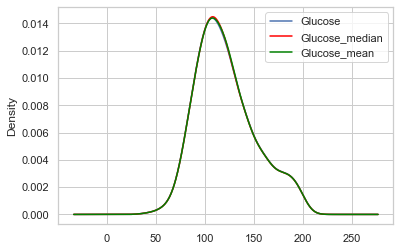

In [185]:
# we can see that the distribution has changed 
# with now more values accumulating towards the median
# or median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Glucose'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Glucose_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Glucose_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [186]:
X_train.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_median,Glucose_mean
Pregnancies,11.799119,10.653632,8.131031,2.720128,28.296017,-0.001955,-0.097052,21.639807,10.595073,10.594003
Glucose,10.653632,910.664615,71.082156,74.655254,2088.461455,43.917901,1.546626,91.534822,910.664615,910.664615
BloodPressure,8.131031,71.082156,152.281524,32.203997,93.689162,22.772129,-0.117432,49.348581,70.615874,70.663804
SkinThickness,2.720128,74.655254,32.203997,117.552508,198.237564,49.386498,0.548667,18.833832,73.988766,74.046061
Insulin,28.296017,2088.461455,93.689162,198.237564,14383.971190,168.845591,8.105779,306.025382,2083.423854,2080.637677
BMI,-0.001955,43.917901,22.772129,49.386498,168.845591,46.836729,0.437426,0.194940,43.557531,43.664307
DiabetesPedigreeFunction,-0.097052,1.546626,-0.117432,0.548667,8.105779,0.437426,0.116864,0.021697,1.538453,1.537970
Age,21.639807,91.534822,49.348581,18.833832,306.025382,0.194940,0.021697,144.373454,91.048056,91.022500
Glucose_median,10.595073,910.664615,70.615874,73.988766,2083.423854,43.557531,1.538453,91.048056,905.729954,905.567611
Glucose_mean,10.594003,910.664615,70.663804,74.046061,2080.637677,43.664307,1.537970,91.022500,905.567611,905.567611


#### BMI

In [187]:
X_train['BMI_median'] = X_train['BMI']
X_train['BMI_mean'] = X_train['BMI']
X_test['BMI_median'] = X_test['BMI']
X_test['BMI_mean'] = X_test['BMI']

X_train['BMI_median'] = X_train['BMI'].fillna(X_train['BMI'].median())
X_train['BMI_mean'] = X_train['BMI'].fillna(X_train['BMI'].mean())
X_test['BMI_median'] = X_test['BMI'].fillna(X_train['BMI'].median())
X_test['BMI_mean'] = X_test['BMI'].fillna(X_train['BMI'].mean())

In [188]:
print('Original variable variance: ', X_train['BMI'].var())
print('Variance after median imputation: ', X_train['BMI_median'].var())
print('Variance after mean imputation: ', X_train['BMI_mean'].var())

Original variable variance:  46.8367286442915
Variance after median imputation:  46.22676062772732
Variance after mean imputation:  46.22505494931008


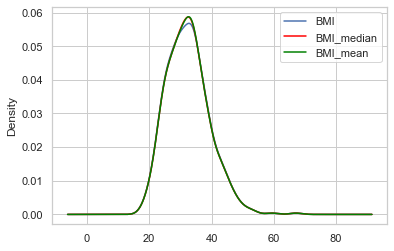

In [189]:
# we can see that the distribution has changed 
# with now more values accumulating towards the median
# or median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['BMI'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['BMI_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['BMI_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [190]:
X_train.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_median,Glucose_mean,BMI_median,BMI_mean
Pregnancies,11.799119,10.653632,8.131031,2.720128,28.296017,-0.001955,-0.097052,21.639807,10.595073,10.594003,-0.003119,-0.001929
Glucose,10.653632,910.664615,71.082156,74.655254,2088.461455,43.917901,1.546626,91.534822,910.664615,910.664615,43.419070,43.336620
BloodPressure,8.131031,71.082156,152.281524,32.203997,93.689162,22.772129,-0.117432,49.348581,70.615874,70.663804,22.623877,22.636342
SkinThickness,2.720128,74.655254,32.203997,117.552508,198.237564,49.386498,0.548667,18.833832,73.988766,74.046061,49.150574,49.137244
Insulin,28.296017,2088.461455,93.689162,198.237564,14383.971190,168.845591,8.105779,306.025382,2083.423854,2080.637677,168.440922,168.347780
BMI,-0.001955,43.917901,22.772129,49.386498,168.845591,46.836729,0.437426,0.194940,43.557531,43.664307,46.836729,46.836729
DiabetesPedigreeFunction,-0.097052,1.546626,-0.117432,0.548667,8.105779,0.437426,0.116864,0.021697,1.538453,1.537970,0.431533,0.431713
Age,21.639807,91.534822,49.348581,18.833832,306.025382,0.194940,0.021697,144.373454,91.048056,91.022500,0.222201,0.192394
Glucose_median,10.595073,910.664615,70.615874,73.988766,2083.423854,43.557531,1.538453,91.048056,905.729954,905.567611,43.070527,42.988682
Glucose_mean,10.594003,910.664615,70.663804,74.046061,2080.637677,43.664307,1.537970,91.022500,905.567611,905.567611,43.176053,43.094064


#### BloodPressure

In [191]:
X_train['BloodPressure_median'] = X_train['BloodPressure']
X_train['BloodPressure_mean'] = X_train['BloodPressure']
X_test['BloodPressure_median'] = X_test['BloodPressure']
X_test['BloodPressure_mean'] = X_test['BloodPressure']

X_train['BloodPressure_median'] = X_train['BloodPressure'].fillna(X_train['BloodPressure'].median())
X_train['BloodPressure_mean'] = X_train['BloodPressure'].fillna(X_train['BloodPressure'].mean())
X_test['BloodPressure_median'] = X_test['BloodPressure'].fillna(X_train['BloodPressure'].median())
X_test['BloodPressure_mean'] = X_test['BloodPressure'].fillna(X_train['BloodPressure'].mean())

In [192]:
print('Original variable variance: ', X_train['BloodPressure'].var())
print('Variance after median imputation: ', X_train['BloodPressure_median'].var())
print('Variance after mean imputation: ', X_train['BloodPressure_mean'].var())

Original variable variance:  152.281524122807
Variance after median imputation:  145.47302593179364
Variance after mean imputation:  145.46294841581556


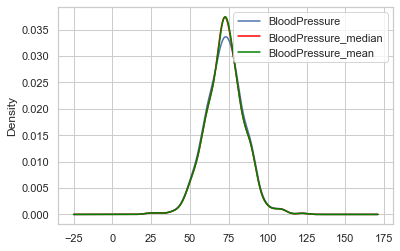

In [193]:
# we can see that the distribution has changed 
# with now more values accumulating towards the median
# or median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['BloodPressure'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['BloodPressure_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['BloodPressure_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [194]:
X_train.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_median,Glucose_mean,BMI_median,BMI_mean,BloodPressure_median,BloodPressure_mean
Pregnancies,11.799119,10.653632,8.131031,2.720128,28.296017,-0.001955,-0.097052,21.639807,10.595073,10.594003,-0.003119,-0.001929,7.755951,7.766955
Glucose,10.653632,910.664615,71.082156,74.655254,2088.461455,43.917901,1.546626,91.534822,910.664615,910.664615,43.419070,43.336620,67.976769,67.879677
BloodPressure,8.131031,71.082156,152.281524,32.203997,93.689162,22.772129,-0.117432,49.348581,70.615874,70.663804,22.623877,22.636342,152.281524,152.281524
SkinThickness,2.720128,74.655254,32.203997,117.552508,198.237564,49.386498,0.548667,18.833832,73.988766,74.046061,49.150574,49.137244,32.019044,32.010541
Insulin,28.296017,2088.461455,93.689162,198.237564,14383.971190,168.845591,8.105779,306.025382,2083.423854,2080.637677,168.440922,168.347780,93.689162,93.689162
BMI,-0.001955,43.917901,22.772129,49.386498,168.845591,46.836729,0.437426,0.194940,43.557531,43.664307,46.836729,46.836729,21.941081,21.908898
DiabetesPedigreeFunction,-0.097052,1.546626,-0.117432,0.548667,8.105779,0.437426,0.116864,0.021697,1.538453,1.537970,0.431533,0.431713,-0.110612,-0.112174
Age,21.639807,91.534822,49.348581,18.833832,306.025382,0.194940,0.021697,144.373454,91.048056,91.022500,0.222201,0.192394,47.178146,47.138943
Glucose_median,10.595073,910.664615,70.615874,73.988766,2083.423854,43.557531,1.538453,91.048056,905.729954,905.567611,43.070527,42.988682,67.549862,67.453969
Glucose_mean,10.594003,910.664615,70.663804,74.046061,2080.637677,43.664307,1.537970,91.022500,905.567611,905.567611,43.176053,43.094064,67.596302,67.499753


#### SkinThickness

In [195]:
X_train['SkinThickness_median'] = X_train['SkinThickness']
X_train['SkinThickness_mean'] = X_train['SkinThickness']

X_train['SkinThickness_median'] = X_train['SkinThickness'].fillna(X_train['SkinThickness'].median())
X_train['SkinThickness_mean'] = X_train['SkinThickness'].fillna(X_train['SkinThickness'].mean())

X_train['SkinThickness_random'] = X_train['SkinThickness'].copy()
X_test['SkinThickness_random'] = X_test['SkinThickness'].copy()
random_sample_train = X_train['SkinThickness'].dropna().sample(X_train['SkinThickness'].isnull().sum(), random_state=0)
random_sample_test = X_train['SkinThickness'].dropna().sample(X_test['SkinThickness'].isnull().sum(), random_state=0)
# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train['SkinThickness'].isnull()].index
random_sample_test.index = X_test[X_test['SkinThickness'].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train['SkinThickness'].isnull(), 'SkinThickness_random'] = random_sample_train
X_test.loc[X_test['SkinThickness'].isnull(), 'SkinThickness_random'] = random_sample_test

In [196]:
print('Original variable variance: ', X_train['SkinThickness'].var())
print('Variance after median imputation: ', X_train['SkinThickness_median'].var())
print('Variance after mean imputation: ', X_train['SkinThickness_mean'].var())
print('Variance after random sampling imputation: ', X_train['SkinThickness_random'].var())

Original variable variance:  117.55250815205244
Variance after median imputation:  80.28783457016586
Variance after mean imputation:  80.26906340233442
Variance after random sampling imputation:  121.06926957391791


In [197]:
X_test['SkinThickness_random'].isnull().sum()

0

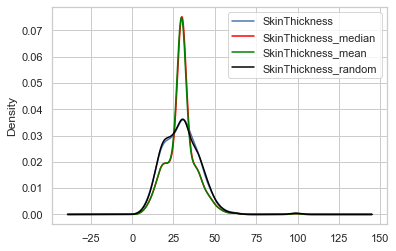

In [198]:
# we can see that the distribution has changed 
# with now more values accumulating towards the median
# or median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['SkinThickness'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['SkinThickness_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['SkinThickness_mean'].plot(kind='kde', ax=ax, color='green')

# variable imputed with the mean
X_train['SkinThickness_random'].plot(kind='kde', ax=ax, color='black')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [199]:
X_train.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_median,Glucose_mean,BMI_median,BMI_mean,BloodPressure_median,BloodPressure_mean,SkinThickness_median,SkinThickness_mean,SkinThickness_random
Pregnancies,11.799119,10.653632,8.131031,2.720128,28.296017,-0.001955,-0.097052,21.639807,10.595073,10.594003,-0.003119,-0.001929,7.755951,7.766955,1.938099,1.857401,3.544276
Glucose,10.653632,910.664615,71.082156,74.655254,2088.461455,43.917901,1.546626,91.534822,910.664615,910.664615,43.419070,43.336620,67.976769,67.879677,50.897717,50.845888,57.206611
BloodPressure,8.131031,71.082156,152.281524,32.203997,93.689162,22.772129,-0.117432,49.348581,70.615874,70.663804,22.623877,22.636342,152.281524,152.281524,23.091843,22.882535,31.681229
SkinThickness,2.720128,74.655254,32.203997,117.552508,198.237564,49.386498,0.548667,18.833832,73.988766,74.046061,49.150574,49.137244,32.019044,32.010541,117.552508,117.552508,117.552508
Insulin,28.296017,2088.461455,93.689162,198.237564,14383.971190,168.845591,8.105779,306.025382,2083.423854,2080.637677,168.440922,168.347780,93.689162,93.689162,198.237564,198.237564,198.237564
BMI,-0.001955,43.917901,22.772129,49.386498,168.845591,46.836729,0.437426,0.194940,43.557531,43.664307,46.836729,46.836729,21.941081,21.908898,33.882410,33.996657,36.037723
DiabetesPedigreeFunction,-0.097052,1.546626,-0.117432,0.548667,8.105779,0.437426,0.116864,0.021697,1.538453,1.537970,0.431533,0.431713,-0.110612,-0.112174,0.367837,0.374649,0.296506
Age,21.639807,91.534822,49.348581,18.833832,306.025382,0.194940,0.021697,144.373454,91.048056,91.022500,0.222201,0.192394,47.178146,47.138943,13.211394,12.860415,16.848808
Glucose_median,10.595073,910.664615,70.615874,73.988766,2083.423854,43.557531,1.538453,91.048056,905.729954,905.567611,43.070527,42.988682,67.549862,67.453969,50.576534,50.522180,56.847077
Glucose_mean,10.594003,910.664615,70.663804,74.046061,2080.637677,43.664307,1.537970,91.022500,905.567611,905.567611,43.176053,43.094064,67.596302,67.499753,50.612842,50.561303,56.886425


#### Insulin

In [232]:
X_train['Insulin_median'] = X_train['Insulin']
X_train['Insulin_mean'] = X_train['Insulin']

X_train['Insulin_median'] = X_train['Insulin'].fillna(X_train['Insulin'].median())
X_train['Insulin_mean'] = X_train['Insulin'].fillna(X_train['Insulin'].mean())

X_train['Insulin_random'] = X_train['Insulin'].copy()
X_train['Insulin_random'] = X_train['Insulin'].fillna(-1)
X_test['Insulin_random'] = X_test['Insulin'].copy()
X_test['Insulin_random'] = X_test['Insulin'].fillna(-1)

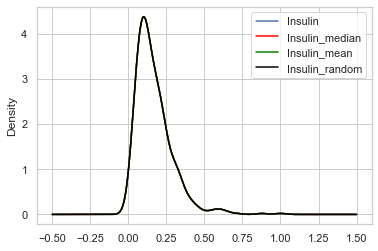

In [233]:
# we can see that the distribution has changed 
# with now more values accumulating towards the median
# or median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Insulin'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Insulin_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Insulin_mean'].plot(kind='kde', ax=ax, color='green')

# variable imputed with the mean
X_train['Insulin_random'].plot(kind='kde', ax=ax, color='black')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [124]:
X_train.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_median,Glucose_mean,BMI_median,BMI_mean,BloodPressure_median,BloodPressure_mean,SkinThickness_median,SkinThickness_mean,SkinThickness_random,Insulin_median,Insulin_mean,Insulin_random
Pregnancies,11.799119,10.653632,8.131031,2.720128,28.296017,-0.001955,-0.097052,21.639807,10.595073,10.594003,-0.003119,-0.001929,7.755951,7.766955,1.938099,1.857401,3.544276,4.957152,13.408933,-31.719743
Glucose,10.653632,910.664615,71.082156,74.655254,2088.461455,43.917901,1.546626,91.534822,910.664615,910.664615,43.419070,43.336620,67.976769,67.879677,50.897717,50.845888,57.206611,1002.211965,991.523396,1048.595506
BloodPressure,8.131031,71.082156,152.281524,32.203997,93.689162,22.772129,-0.117432,49.348581,70.615874,70.663804,22.623877,22.636342,152.281524,152.281524,23.091843,22.882535,31.681229,12.068839,46.478608,-137.253941
SkinThickness,2.720128,74.655254,32.203997,117.552508,198.237564,49.386498,0.548667,18.833832,73.988766,74.046061,49.150574,49.137244,32.019044,32.010541,117.552508,117.552508,117.552508,133.770038,137.574703,117.259518
Insulin,28.296017,2088.461455,93.689162,198.237564,14383.971190,168.845591,8.105779,306.025382,2083.423854,2080.637677,168.440922,168.347780,93.689162,93.689162,198.237564,198.237564,198.237564,14383.971190,14383.971190,14383.971190
BMI,-0.001955,43.917901,22.772129,49.386498,168.845591,46.836729,0.437426,0.194940,43.557531,43.664307,46.836729,46.836729,21.941081,21.908898,33.882410,33.996657,36.037723,89.921785,80.832393,129.365623
DiabetesPedigreeFunction,-0.097052,1.546626,-0.117432,0.548667,8.105779,0.437426,0.116864,0.021697,1.538453,1.537970,0.431533,0.431713,-0.110612,-0.112174,0.367837,0.374649,0.296506,4.702580,3.841171,8.440701
Age,21.639807,91.534822,49.348581,18.833832,306.025382,0.194940,0.021697,144.373454,91.048056,91.022500,0.222201,0.192394,47.178146,47.138943,13.211394,12.860415,16.848808,108.097724,145.019491,-52.125990
Glucose_median,10.595073,910.664615,70.615874,73.988766,2083.423854,43.557531,1.538453,91.048056,905.729954,905.567611,43.070527,42.988682,67.549862,67.453969,50.576534,50.522180,56.847077,998.047100,987.294140,1044.710070
Glucose_mean,10.594003,910.664615,70.663804,74.046061,2080.637677,43.664307,1.537970,91.022500,905.567611,905.567611,43.176053,43.094064,67.596302,67.499753,50.612842,50.561303,56.886425,996.602570,985.973825,1042.726501


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [202]:
selected_vars = ['Pregnancies','Glucose_mean','BMI_mean','BloodPressure_mean','SkinThickness_random','Insulin','DiabetesPedigreeFunction','Age']

In [205]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train[selected_vars])
X_train = pd.DataFrame(scaler.transform(X_train[selected_vars]), columns = selected_vars)
X_test = pd.DataFrame(scaler.transform(X_test[selected_vars]), columns = selected_vars)

y_train = y_train.reset_index()
y_test = y_test.reset_index()

In [206]:
X_test.isnull().sum()

Pregnancies                  0
Glucose_mean                 0
BMI_mean                     0
BloodPressure_mean           0
SkinThickness_random         0
Insulin                     92
DiabetesPedigreeFunction     0
Age                          0
dtype: int64

In [207]:
X_test.describe()

,Pregnancies,Glucose_mean,BMI_mean,BloodPressure_mean,SkinThickness_random,Insulin,DiabetesPedigreeFunction,Age
count,231.000000,231.000000,231.000000,231.000000,231.000000,139.000000,231.000000,231.000000
mean,0.200153,0.505455,0.293598,0.492152,0.232684,0.173466,0.166744,0.180592
std,0.186806,0.201779,0.144442,0.124521,0.109322,0.140627,0.130722,0.184029
min,0.000000,0.077419,0.000000,0.061224,0.000000,0.004808,0.002989,0.000000
25%,0.058824,0.345161,0.190184,0.408163,0.152174,0.081731,0.073442,0.033333
50%,0.176471,0.490323,0.290670,0.489796,0.228261,0.134615,0.132792,0.116667
75%,0.294118,0.645161,0.381391,0.571429,0.315217,0.230769,0.234842,0.283333
max,0.823529,0.993548,0.799591,0.918367,0.532609,0.800481,0.727156,0.800000


In [208]:
train_df = pd.concat([X_train, y_train], axis = 1)
test_df = pd.concat([X_test, y_test], axis = 1)
Insulin_df = pd.concat([train_df, test_df],axis =0)

train_df.shape, test_df.shape, Insulin_df.shape

((537, 11), (231, 11), (768, 11))

In [209]:
training_vars = ['Pregnancies','Glucose_mean','BMI_mean','BloodPressure_mean','DiabetesPedigreeFunction','SkinThickness_random','Age','Outcome','Insulin']
train_df = Insulin_df.loc[Insulin_df.Insulin.isnull()==False,training_vars]
test_df = Insulin_df.loc[Insulin_df.Insulin.isnull()==True,training_vars]

X_train = train_df.drop(['Insulin'],axis=1)
y_train = train_df.Insulin
X_test = test_df.drop(['Insulin'],axis=1)
y_test = test_df.Insulin

X_train.shape, X_test.shape

((394, 8), (374, 8))

In [211]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)
test_pred = pd.DataFrame(test_pred,columns=['Insulin'])
test_pred.index = y_test.index

[19:51:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [212]:
test_pred.index

Int64Index([  0,   1,   2,   3,   5,   7,  12,  15,  16,  17,
            ...
            190, 197, 198, 204, 219, 221, 224, 227, 229, 230], dtype='int64', length=374)

In [213]:
X_test.index

Int64Index([  0,   1,   2,   3,   5,   7,  12,  15,  16,  17,
            ...
            190, 197, 198, 204, 219, 221, 224, 227, 229, 230], dtype='int64', length=374)

In [214]:
train_df = pd.concat([X_train, y_train], axis = 1)
test_df = pd.concat([X_test, test_pred], axis = 1)
prediction_df = pd.concat([train_df, test_df],axis =0)
prediction_df.head()

,Pregnancies,Glucose_mean,BMI_mean,BloodPressure_mean,DiabetesPedigreeFunction,SkinThickness_random,Age,Outcome,Insulin
4,0.058824,0.303226,0.143149,0.306122,0.066610,0.195652,0.033333,0,0.103365
6,0.235294,0.522581,0.218814,0.469388,0.455167,0.119565,0.400000,1,0.129808
8,0.294118,0.419355,0.359918,0.387755,0.186166,0.369565,0.066667,1,0.138221
9,0.411765,0.922581,0.321063,0.265306,0.319385,0.282609,0.216667,1,0.454327
10,0.058824,0.419355,0.100204,0.142857,0.140478,0.119565,0.083333,0,0.127404


In [217]:
prediction_df.shape

# shuffle data
from sklearn.utils import shuffle
prediction_df = shuffle(prediction_df)

In [218]:
X_train, X_test, y_train, y_test = train_test_split(prediction_df.drop(['Outcome'],axis=1),prediction_df.Outcome, test_size = 0.3, random_state = 0, stratify = df.Outcome)

X_train.shape, X_test.shape

((537, 8), (231, 8))

In [219]:
y_train.mean(), y_test.mean()

(0.3407821229050279, 0.36796536796536794)

# Train and perform cross validation

In [220]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

kfold = KFold(n_splits = 10, random_state = 10)
scores = cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
scores

array([0.68518519, 0.74074074, 0.72222222, 0.87037037, 0.81481481,
       0.83333333, 0.72222222, 0.77358491, 0.71698113, 0.77358491])

In [221]:
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std() * 2))

Accuracy: 76.53% (+/- 11.19%)


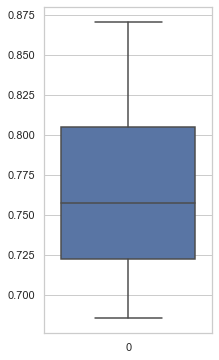

In [222]:
plt.figure(figsize=(3,6))
sns.boxplot(data=scores)
plt.show()

# Prediction

In [223]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
prob_train_pred = model.predict_proba(X_train)

y_test_pred = model.predict(X_test)
prob_test_pred = model.predict_proba(X_test)

# Model Interpretation

In [225]:
feature_names = X_train.columns.values
coefficient_list = list(model.coef_[0])
feature_coefficient = [(feature, coefficient) for feature, coefficient in zip(feature_names, coefficient_list)]
feature_coefficient

[('Pregnancies', 1.7948350088819371),
 ('Glucose_mean', 3.6049929376037873),
 ('BMI_mean', 2.750453875284689),
 ('BloodPressure_mean', 0.12707141628916757),
 ('DiabetesPedigreeFunction', 1.0356346080307377),
 ('SkinThickness_random', -0.5579467742037827),
 ('Age', 0.5960614879926275),
 ('Insulin', 0.96072057000783)]

=> Important features from the model: Glucose, BMI, Insulin, SkinThickness

# Model Evaluation

### Accuracy

In [226]:
accuracy_score(y_train, y_train_pred)

0.770949720670391

In [227]:
accuracy_score(y_test, y_test_pred)

0.7748917748917749

### Confusion matrix

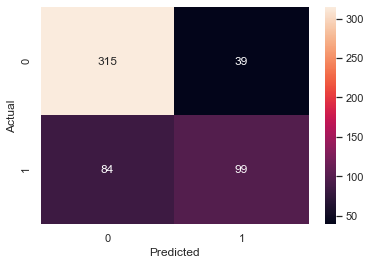

In [228]:
cm_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred))
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
sns.heatmap(cm_df, annot=True, fmt="d")
plt.show()

In [229]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       354
           1       0.72      0.54      0.62       183

    accuracy                           0.77       537
   macro avg       0.75      0.72      0.73       537
weighted avg       0.76      0.77      0.76       537



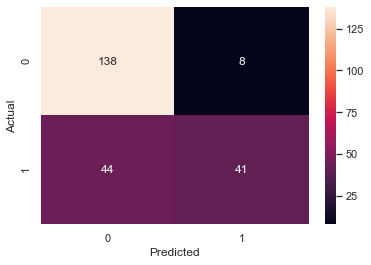

In [230]:
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
sns.heatmap(cm_df, annot=True, fmt="d")
plt.show()

### Classification Report

In [231]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       146
           1       0.84      0.48      0.61        85

    accuracy                           0.77       231
   macro avg       0.80      0.71      0.73       231
weighted avg       0.79      0.77      0.76       231



### ROC AUC Score

In [257]:
roc_auc_score(y_train, prob_train_pred[:,1])

0.8350190985485104

In [258]:
roc_auc_score(y_test, prob_test_pred[:,1])

0.8529218106995885

### ROC Curve

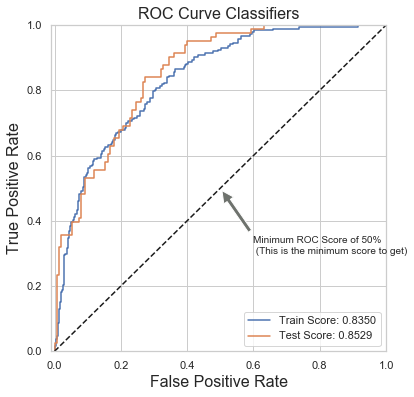

In [259]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, threshold = roc_curve(y_train, prob_train_pred[:,1])
fpr_test, tpr_test, threshold = roc_curve(y_test, prob_test_pred[:,1])

plt.figure(figsize=(6,6))
plt.title('ROC Curve Classifiers', fontsize=16)
plt.plot(fpr_train, tpr_train, label= 'Train Score: {:.4f}'.format(roc_auc_score(y_train, prob_train_pred[:,1])))
plt.plot(fpr_test, tpr_test, label= 'Test Score: {:.4f}'.format(roc_auc_score(y_test, prob_test_pred[:,1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
        
plt.show()


### Precision-Recall curve

Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.77')

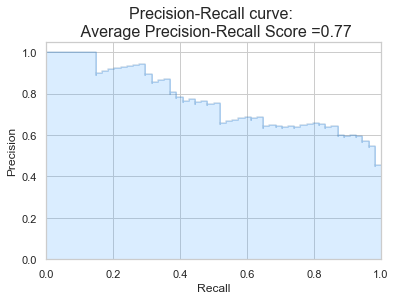

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = prob_test_pred[:,1]
precision, recall, threshold = precision_recall_curve(y_test,y_score)
average_precision = average_precision_score(y_test, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

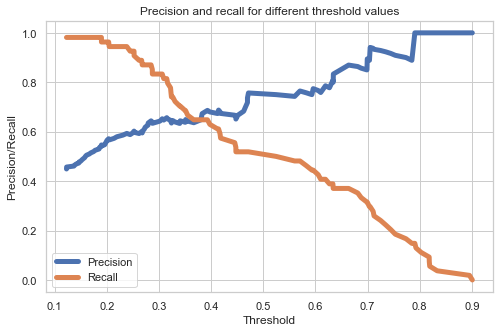

In [27]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.70')

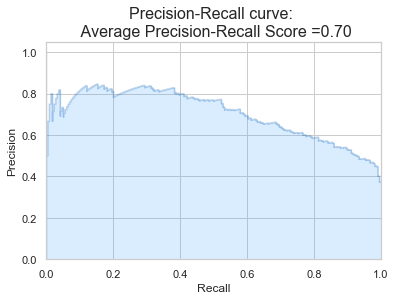

In [28]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = prob_train_pred[:,1]
precision, recall, threshold = precision_recall_curve(y_train,y_score)
average_precision = average_precision_score(y_train, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

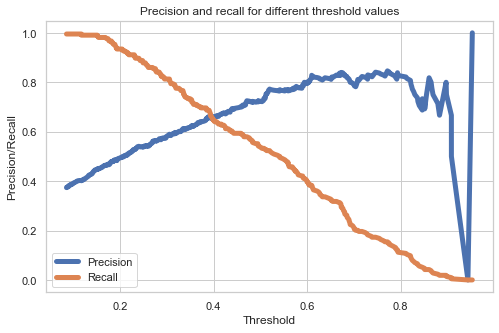

In [29]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

### Summary

In [30]:
def ModelEvaluation(model,X_train,y_train,X_test,y_test,name):
    print('Model Evaluation of ' + name)

    print('-----------------------------------------------------------')
    print('Train set')
    print('Accuracy: ', accuracy_score(y_train, y_train_pred))
    print('ROC AUC Score: ', roc_auc_score(y_train, prob_train_pred[:,1]))
    cm_df = pd.DataFrame(confusion_matrix(y_train,y_train_pred), index=model.classes_,columns=model.classes_)
    cm_df.index.name = 'Predicted'
    cm_df.columns.name = 'True'
    print('Confusion matrix')
    print(cm_df)
    print(classification_report(y_train, y_train_pred))
    
    print('-----------------------------------------------------------')
    print('Test set')
    print('Accuracy: ', accuracy_score(y_test, y_test_pred))
    print('ROC AUC Score: ', roc_auc_score(y_test, prob_test_pred[:,1]))
    cm_df = pd.DataFrame(confusion_matrix(y_test,y_test_pred), index=model.classes_,columns=model.classes_)
    cm_df.index.name = 'Predicted'
    cm_df.columns.name = 'True'
    print('Confusion matrix')
    print(cm_df)
    print(classification_report(y_test, y_test_pred))
    

In [31]:
ModelEvaluation(model,X_train,y_train,X_test,y_test,'DT')

Model Evaluation of DT
-----------------------------------------------------------
Train set
Accuracy:  0.7671009771986971
ROC AUC Score:  0.8365654205607477
Confusion matrix
True         0    1
Predicted          
0          356   44
1           99  115
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       400
           1       0.72      0.54      0.62       214

    accuracy                           0.77       614
   macro avg       0.75      0.71      0.72       614
weighted avg       0.76      0.77      0.76       614

-----------------------------------------------------------
Test set
Accuracy:  0.7727272727272727
ROC AUC Score:  0.8631481481481481
Confusion matrix
True        0   1
Predicted        
0          91   9
1          26  28
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                   

# Tuning hyper-parameters

In [32]:
# Specify parameters
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
params = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

grid_search = GridSearchCV(LogisticRegression(), params, cv = 10)
grid_search.fit(X_train, y_train)

# tree best estimator
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
scores = cross_val_score(model, X_train, y_train, cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std() * 2))

Accuracy: 76.71% (+/- 8.89%)


In [34]:
scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std() * 2))

Accuracy: 76.71% (+/- 8.89%)


In [35]:
scores

array([0.75806452, 0.80645161, 0.70967742, 0.80645161, 0.67213115,
       0.75409836, 0.80327869, 0.7704918 , 0.81967213, 0.7704918 ])

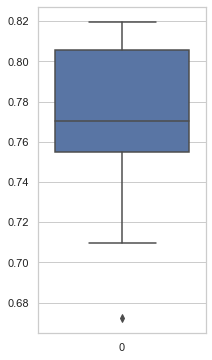

In [36]:
plt.figure(figsize=(3,6))
sns.boxplot(data=scores)
plt.show()

In [37]:
model = best_model

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
prob_train_pred = model.predict_proba(X_train)

y_test_pred = model.predict(X_test)
prob_test_pred = model.predict_proba(X_test)

In [38]:
ModelEvaluation(model,X_train,y_train,X_test,y_test,'DT')

Model Evaluation of DT
-----------------------------------------------------------
Train set
Accuracy:  0.7671009771986971
ROC AUC Score:  0.8365654205607477
Confusion matrix
True         0    1
Predicted          
0          356   44
1           99  115
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       400
           1       0.72      0.54      0.62       214

    accuracy                           0.77       614
   macro avg       0.75      0.71      0.72       614
weighted avg       0.76      0.77      0.76       614

-----------------------------------------------------------
Test set
Accuracy:  0.7727272727272727
ROC AUC Score:  0.8631481481481481
Confusion matrix
True        0   1
Predicted        
0          91   9
1          26  28
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                   

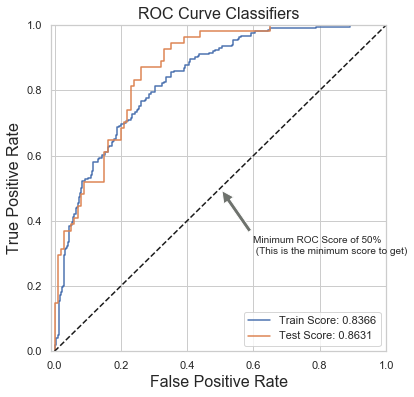

In [39]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, threshold = roc_curve(y_train, prob_train_pred[:,1])
fpr_test, tpr_test, threshold = roc_curve(y_test, prob_test_pred[:,1])

plt.figure(figsize=(6,6))
plt.title('ROC Curve Classifiers', fontsize=16)
plt.plot(fpr_train, tpr_train, label= 'Train Score: {:.4f}'.format(roc_auc_score(y_train, prob_train_pred[:,1])))
plt.plot(fpr_test, tpr_test, label= 'Test Score: {:.4f}'.format(roc_auc_score(y_test, prob_test_pred[:,1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
        
plt.show()
